<a href="https://colab.research.google.com/github/OnkarMulay10/EEG_Epilepsy/blob/main/EEG_epilepsy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import Normalizer

In [23]:
d=pd.read_csv('data.csv')
print(d.shape)

(11500, 180)


In [37]:
d.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,skew,mean,kurtosis,variance
0,X21.V1.791,0.001960,0.002758,0.003324,0.003237,0.002787,0.001815,0.000798,-0.000131,-0.000479,-0.000552,-0.000145,0.000508,0.000929,0.001640,0.002207,0.002381,0.001844,0.000726,-0.000682,-0.001757,-0.002003,-0.001815,-0.001466,-0.000726,0.000160,0.000566,0.000348,0.000697,0.000929,0.000668,0.000189,-0.000276,-0.000886,-0.001394,-0.001887,-0.001916,-0.001684,-0.001669,-0.001031,...,0.001553,0.000929,0.000465,0.000261,-0.000363,-0.001002,-0.000944,-0.000639,-0.000479,-0.000827,-0.001277,-0.001655,-0.001887,-0.001655,-0.001205,-0.000769,-0.001147,-0.001045,-0.001234,-0.001582,-0.001423,-0.001045,-0.000944,-0.000915,-0.000160,0.000145,0.000116,-0.000247,-0.000218,-0.000450,-0.001118,-0.001495,-0.001844,-0.001684,-0.001205,-0.000740,-0.202033,-0.001373,176.921441,172.937696
1,X15.V1.924,0.002887,0.002857,0.002662,0.002475,0.002393,0.002356,0.002296,0.002034,0.001825,0.001735,0.001772,0.001929,0.001585,0.000015,-0.001997,-0.004524,-0.006356,-0.007486,-0.008293,-0.008151,-0.007231,-0.005579,-0.003470,-0.001137,0.000882,0.002378,0.003193,0.003537,0.003627,0.003343,0.002969,0.002535,0.002333,0.002348,0.002438,0.002505,0.002483,0.002423,0.002318,...,0.002012,0.002221,0.002296,0.002266,0.002281,0.002288,0.002296,0.002094,0.001727,0.001189,0.000636,0.000381,0.000322,0.000464,0.000471,0.000471,0.000516,0.000666,0.000920,0.001017,0.000950,0.000763,0.000710,0.000785,0.000980,0.001219,0.001256,0.001226,0.001122,0.001092,0.001137,0.001174,0.001167,0.001152,0.001069,0.000965,-1.523960,-0.008305,179.637933,178.315447
2,X8.V1.1,-0.000555,-0.000677,-0.000816,-0.000642,-0.000555,-0.000625,-0.000989,-0.001267,-0.001475,-0.001632,-0.001718,-0.001632,-0.001666,-0.001805,-0.001788,-0.001597,-0.001302,-0.001198,-0.001198,-0.000920,-0.000642,-0.000243,-0.000174,-0.000677,-0.001354,-0.001770,-0.001701,-0.001389,-0.000937,-0.000694,-0.000608,-0.000677,-0.000555,-0.000226,0.000122,0.000590,0.000712,0.000573,0.000104,...,-0.002152,-0.001875,-0.001458,-0.001180,-0.001059,-0.000972,-0.001094,-0.001076,-0.000573,0.000017,0.000486,0.000781,0.000642,0.000833,0.001076,0.001389,0.001146,0.000399,-0.000191,-0.000677,-0.000764,-0.000729,-0.000781,-0.000833,-0.000729,-0.000104,0.000503,0.000989,0.001111,0.000833,0.000330,-0.000208,-0.000521,-0.000608,-0.000608,-0.000625,0.498697,0.002026,179.834175,178.673213
3,X16.V1.60,-0.001426,-0.001372,-0.001304,-0.001250,-0.001209,-0.001290,-0.001385,-0.001358,-0.001182,-0.001073,-0.000978,-0.000924,-0.001005,-0.001087,-0.001127,-0.000992,-0.000924,-0.000829,-0.000788,-0.000801,-0.000869,-0.001073,-0.001141,-0.001318,-0.001277,-0.001141,-0.001046,-0.001019,-0.000978,-0.000924,-0.001032,-0.001032,-0.000978,-0.000910,-0.000937,-0.000937,-0.000937,-0.000910,-0.000924,...,-0.000937,-0.000829,-0.000693,-0.000611,-0.000611,-0.000666,-0.000788,-0.000869,-0.001059,-0.001087,-0.001222,-0.001182,-0.001127,-0.001059,-0.000869,-0.000516,-0.000299,-0.000394,-0.000570,-0.000693,-0.000924,-0.000964,-0.000937,-0.000937,-0.001005,-0.001005,-0.001087,-0.001114,-0.001100,-0.001087,-0.001046,-0.001155,-0.001046,-0.000978,-0.000937,-0.000883,0.370253,0.001138,179.966329,178.937060
4,X20.V1.54,-0.000272,-0.001967,-0.002965,-0.003086,-0.002360,-0.001452,-0.000484,0.000000,-0.000635,-0.001785,-0.002723,-0.003117,-0.002542,-0.001301,-0.000272,0.000091,-0.000635,-0.001815,-0.002905,-0.003117,-0.002269,-0.000877,0.000424,0.001664,0.002360,0.002209,0.000847,-0.000393,-0.001301,-0.002058,-0.002360,-0.002269,-0.001664,-0.001241,-0.000575,-0.000605,-0.000877,-0.001089,-0.000605,...,-0.000121,-0.000393,-0.000242,0.000000,0.000303,0.000575,0.000877,0.001725,0.001906,0.001362,0.000212,-0.000393,-

##Data Transformation and Normalization


##Balanced Dataset

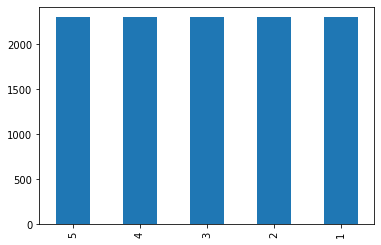

In [4]:
d['y'].value_counts().plot(kind='bar');

In [5]:
#d.rename(columns={ d.columns[0]: "Index" }, inplace = True)
#d = d.set_index(d['Index'])
#d.drop('Index',axis='columns',inplace=True)

##Saumya Dataset


In [6]:
ds=d

##Features

In [25]:
y=d.y
d.drop(columns='y')
d.iloc[:,1:] = Normalizer(norm='l1').fit_transform(d.iloc[:,1:])
d['y']=y

In [26]:
d['y']=d['y'].astype(int)
d_e=d[d["y"]==1]
d_ne=d[d["y"]!=1]

In [28]:
d_e.shape

(2300, 180)

(array([[ 0.,  0., 16., ...,  0.,  0.,  0.],
        [ 0.,  0.,  8., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  0.,  9., ...,  0.,  0.,  0.],
        [ 0.,  0.,  7., ...,  0.,  0.,  0.]]),
 array([-0.02489217, -0.01889638, -0.01290059, -0.0069048 , -0.00090901,
         0.00508678,  0.01108257,  0.01707836,  0.02307415,  0.02906993,
         0.03506572]),
 <a list of 2300 Lists of Patches objects>)

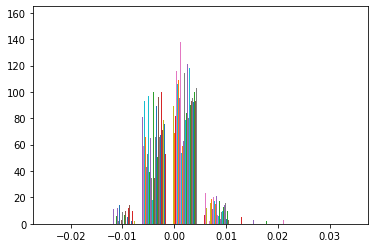

In [29]:
matrix=d_e.iloc[:,1:179]
plt.hist(matrix)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.01728198, -0.01351446, -0.00974694, -0.00597941, -0.00221189,
         0.00155563,  0.00532315,  0.00909068,  0.0128582 ,  0.01662572,
         0.02039324]),
 <a list of 9200 Lists of Patches objects>)

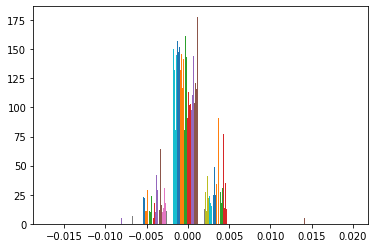

In [30]:
matrix2=d_ne.iloc[:,1:179]
plt.hist(matrix2)

In [36]:
d.drop('y',axis='columns',inplace=True)
d['skew']=d.skew(axis = 1, skipna = True) 
d['mean']=d.mean(axis = 1, skipna = True) 
#d['median']=d.meadian(axis = 1, skipna = True) 
d['kurtosis']=d.kurtosis(axis = 1, skipna = True) 
d['variance']=d.var(axis = 1, skipna = True) 

In [35]:
#d.info()
#d.iloc[:,1:]=d.iloc[:,1:].astype(int)
row=d.iloc[:1,1:179]
time=range(178)


range(0, 178)
